# Random Forest
 
Use the Random Forest Algorithm to train and test a model.

In [75]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

nba_data = pd.read_csv('../output/new_nba_data.csv')
nba_data.sample(10, random_state=13)

,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalAttempts,FieldGoalPercent,3PointMade,3PointAttempts,3PointAttemptsPercent,...,FreeThrowAttempts,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,CareerLongerThan5Years
1243,Tyler Johnson,32,18.8,5.9,2.2,5.2,41.9,0.6,1.5,37.5,...,1.5,68.1,0.4,2.1,2.5,1.3,1.0,0.3,0.9,0.0
1134,Eric Washington,66,23.3,7.7,3.0,7.5,40.4,0.7,2.1,32.1,...,1.3,78.3,0.7,1.2,1.9,1.2,0.8,0.4,1.1,0.0
507,Sam Williams,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,0.0,...,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,0.0
279,John Williams,78,22.7,9.2,3.6,8.0,45.4,0.1,0.5,22.2,...,2.9,64.6,1.7,3.0,4.7,2.4,1.6,0.4,1.6,1.0
512,Jim Brogan,63,16.3,6.3,2.6,5.8,45.3,0.1,0.5,28.1,...,1.3,72.6,1.0,0.9,1.9,2.5,0.8,0.2,1.3,0.0
103,Tate George,56,10.6,3.4,1.4,3.4,41.5,0.0,0.0,0.0,...,0.7,80.0,0.3,0.5,0.8,1.9,0.5,0.1,0.8,0.0
33,Bison Dele,48,18.9,9.1,3.6,6.8,52.8,0.0,0.0,0.0,...,3.0,66.9,2.4,3.3,5.7,0.7,0.8,1.1,1.8,1.0
783,Corey Brewer,79,22.8,5.8,2.3,6.2,37.4,0.1,0.5,19.4,...,1.4,80.0,1.0,2.7,3.7,1.4,1.0,0.3,1.1,1.0
1254,Monty Williams,41,12.3,3.3,1.5,3.2,45.1,0.0,0.2,0.0,...,0.9,44.7,1.0,1.4,2.4,1.2,0.5,0.1,1.0,1.0
291,Dennis Rodman*,77,15.0,6.5,2.8,5.1,54.5,0.0,0.0,0.0,...,1.6,58.7,2.1,2.2,4.3,0.7,0.5,0.6,1.2,1.0


The names of the players are not required for decisions, so we will be ignoring it

In [76]:
nba_data.drop('Name', inplace=True, axis=1)

In [77]:
X = nba_data[nba_data.columns[:-1]]
y = nba_data['CareerLongerThan5Years']
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=13,stratify=y)
dt_model = RandomForestClassifier(random_state=13)
dt_model.fit(train_X, train_y)
pred_y = dt_model.predict(test_X)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(test_y, pred_y))) 
print('Recall: {:.2%}'.format(metrics.recall_score(test_y, pred_y))) 
print('Precision: {:.2%}'.format(metrics.precision_score(test_y, pred_y))) 
print('F1 Score: {:.2%}'.format(metrics.f1_score(test_y, pred_y)))

Accuracy: 68.96%
Recall: 78.37%
Precision: 73.42%
F1 Score: 75.81%


The accuracy of 57% is pretty low. So let's try using a Cross-Validation to see if the random split affects our test.

In [78]:
scores = cross_val_score(dt_model, X, y, scoring='accuracy', cv=5)
scores.mean()

0.6828358208955224

By using cross validation, the score is 61%. Let's take a look at the Feature Importances.

In [79]:
feature_importances = pd.Series(dt_model.feature_importances_, index=nba_data.columns[:-1])
feature_importances.sort_values(ascending=False)

GamesPlayed              0.127964
FieldGoalPercent         0.075578
MinutesPlayed            0.065323
FreeThrowPercent         0.064924
FreeThrowMade            0.062415
FieldGoalsMade           0.057838
FreeThrowAttempts        0.056631
PointsPerGame            0.055525
FieldGoalAttempts        0.052701
DefensiveRebounds        0.048180
Rebounds                 0.045638
Assists                  0.045151
OffensiveRebounds        0.043920
3PointAttemptsPercent    0.041697
Turnovers                0.041038
Steals                   0.033975
3PointAttempts           0.031927
Blocks                   0.031481
3PointMade               0.018094
dtype: float64

<AxesSubplot: >

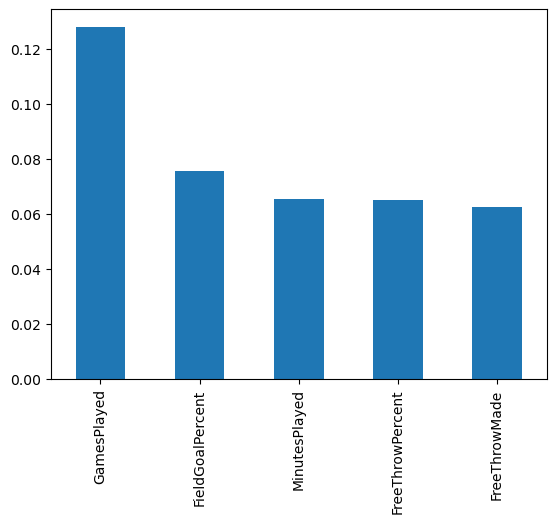

In [80]:
feature_importances.nlargest(5).plot(kind='bar')

First, let's try the train-validation-test method to play around with the hyperparameters. we'll use a 70%-15%-15% split.

array([<AxesSubplot: ylabel='0'>], dtype=object)

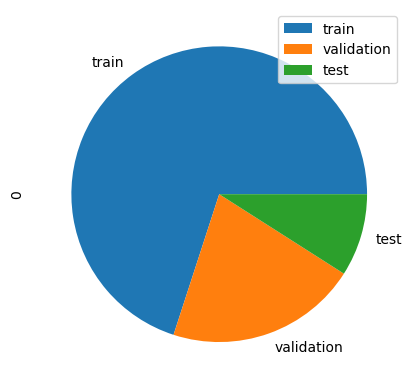

In [81]:
X_train, X_test_full, y_train, y_test_full = train_test_split(X, y, random_state=13, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_test_full, y_test_full, random_state=13, test_size=0.3)

pd.DataFrame([len(y_train), len(y_val), len(y_test)], index=['train','validation', 'test']).plot(kind='pie', subplots=True)

Let's verify if the data has been split correctly.

<AxesSubplot: title={'center': 'test'}, ylabel='CareerLongerThan5Years'>

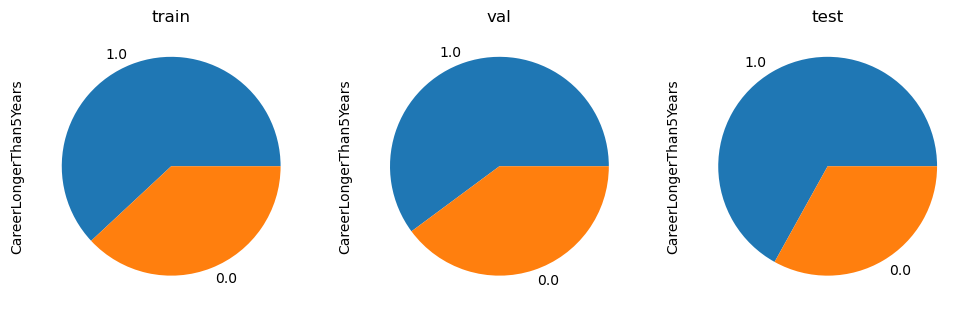

In [82]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))
y_train.value_counts().plot(kind='pie', ax=ax1, title='train')
y_val.value_counts().plot(kind='pie', ax=ax2, title='val')
y_test.value_counts().plot(kind='pie', ax=ax3, title='test')

In [83]:
dt_model = RandomForestClassifier(random_state=13) 
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_val)
accuracy_score = metrics.accuracy_score(y_val, y_pred)
print('Accuracy: {:.2%}'.format(accuracy_score)) 

Accuracy: 62.63%


Let's play with the hyperparameters and see if we can get a better result. Let's start with max depth.

In [105]:
def train_and_find_best_depth(X_train, X_val, y_train, y_val, do_print): 
    result = None
    accuracy_max = -1
    for curr_max_depth in range(1, 20):
        dt_model = RandomForestClassifier(max_depth=curr_max_depth,random_state=13) 
        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_val)
        accuracy_score = metrics.accuracy_score(y_val, y_pred)

        if accuracy_score >= accuracy_max: 
            accuracy_max = accuracy_score 
            result = curr_max_depth
            if do_print:
                print('max depth {}: {:.2%} accuracy on validation set.'.format(curr_max_depth, accuracy_score))
            if do_print: 
                print('-' * 20)
    print('best max depth {} has {:.2%} accuracy.'.format(result,accuracy_max))

    return result
    
best_max_depth = train_and_find_best_depth(X_train, X_val, y_train, y_val, True)

max depth 1: 61.57% accuracy on validation set.
--------------------
max depth 3: 62.63% accuracy on validation set.
--------------------
max depth 4: 62.99% accuracy on validation set.
--------------------
max depth 5: 62.99% accuracy on validation set.
--------------------
max depth 6: 63.35% accuracy on validation set.
--------------------
max depth 8: 63.35% accuracy on validation set.
--------------------
max depth 11: 63.35% accuracy on validation set.
--------------------
max depth 13: 63.35% accuracy on validation set.
--------------------
max depth 14: 63.35% accuracy on validation set.
--------------------
best max depth 14 has 63.35% accuracy.


Let's continue with n_estimators. AKA the number of trees in the forest.

In [106]:
def train_and_find_n_estimators(X_train, X_val, y_train, y_val, do_print): 
    result = None
    accuracy_max = -1
    for n_estimators in range(1, 100):
        dt_model = RandomForestClassifier(n_estimators=n_estimators,random_state=13) 
        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_val)
        accuracy_score = metrics.accuracy_score(y_val, y_pred)

        if accuracy_score >= accuracy_max: 
            accuracy_max = accuracy_score 
            result = n_estimators
            if do_print:
                print('n estimators {}: {:.2%} accuracy on validation set.'.format(n_estimators, accuracy_score))
            if do_print: 
                print('-' * 20)
    print('n estimators {} has {:.2%} accuracy.'.format(result,accuracy_max))

    return result
    
best_n_estimators = train_and_find_n_estimators(X_train, X_val, y_train, y_val, True)

n estimators 1: 57.30% accuracy on validation set.
--------------------
n estimators 3: 62.28% accuracy on validation set.
--------------------
n estimators 5: 62.28% accuracy on validation set.
--------------------
n estimators 30: 62.28% accuracy on validation set.
--------------------
n estimators 31: 62.63% accuracy on validation set.
--------------------
n estimators 32: 63.70% accuracy on validation set.
--------------------
n estimators 34: 64.06% accuracy on validation set.
--------------------
n estimators 35: 64.06% accuracy on validation set.
--------------------
n estimators 37: 65.48% accuracy on validation set.
--------------------
n estimators 44: 65.48% accuracy on validation set.
--------------------
n estimators 44 has 65.48% accuracy.


Now let's try to adjust the min_samples_split parameter which is the minimal number of different data placed in a node before the node is split

In [102]:
def train_and_find_min_samples_split(X_train, X_val, y_train, y_val, do_print): 
    result = None
    accuracy_max = -1
    for min_samples_split in range(2, 20):
        dt_model = RandomForestClassifier(min_samples_split=min_samples_split,random_state=13) 
        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_val)
        accuracy_score = metrics.accuracy_score(y_val, y_pred)

        if accuracy_score >= accuracy_max: 
            accuracy_max = accuracy_score 
            result = min_samples_split
            if do_print:
                print('min samples split {}: {:.2%} accuracy on validation set.'.format(min_samples_split, accuracy_score))
            if do_print: 
                print('-' * 20)
    print('min samples split {} has {:.2%} accuracy.'.format(result,accuracy_max))

    return result

min_samples_split = train_and_find_min_samples_split(X_train, X_val, y_train, y_val, True)

min samples split 2: 62.63% accuracy on validation set.
--------------------
min samples split 4: 63.70% accuracy on validation set.
--------------------
min samples split 6: 63.70% accuracy on validation set.
--------------------
min samples split 8: 63.70% accuracy on validation set.
--------------------
min samples split 8 has 63.70% accuracy.


Let's try the max_features parameter. It is the max number of features who are considered when splitting a node.

In [109]:
def train_and_find_max_features(X_train, X_val, y_train, y_val, do_print): 
    result = None
    accuracy_max = -1
    for max_features in range(1, 20):
        dt_model = RandomForestClassifier(max_features=max_features,random_state=13) 
        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_val)
        accuracy_score = metrics.accuracy_score(y_val, y_pred)

        if accuracy_score >= accuracy_max: 
            accuracy_max = accuracy_score 
            result = max_features
            if do_print:
                print('max features split {}: {:.2%} accuracy on validation set.'.format(max_features, accuracy_score))
            if do_print: 
                print('-' * 20)
    print('max features split {} has {:.2%} accuracy.'.format(result,accuracy_max))

    return result

max_features = train_and_find_max_features(X_train, X_val, y_train, y_val, True)

max features split 1: 63.70% accuracy on validation set.
--------------------
max features split 2: 65.12% accuracy on validation set.
--------------------
max features split 13: 65.48% accuracy on validation set.
--------------------
max features split 15: 65.84% accuracy on validation set.
--------------------
max features split 15 has 65.84% accuracy.


In [129]:
dt_model = RandomForestClassifier(max_depth=best_max_depth,n_estimators=best_n_estimators, random_state=13, min_samples_split=min_samples_split,max_features=max_features)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
accuracy_score_imputed = metrics.accuracy_score(y_test, y_pred) 
print('Accuracy: {:.2%}'.format(accuracy_score_imputed))

Accuracy: 69.42%


Imputing data is not required. The only data that we missed were the Percent of successful 3-Throws of players who did not have any 3 Throws (0)

By using the train-validation test method without any hyperparameters, an accuracy of 62.63% has been reached. By adding hyperparameters, it rose up to 69.42. Which is a little bit higher than the train-test split method (68.96%).